In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
with open('data/pkl/df_snapshot2.pkl', 'rb') as f:
    dfs = pickle.load(f)

dfs.head()

,name,user,date,text
0,Roberto Marsicano,@cannedcat.bsky.social,2024/09/21 13:32:48\n1h,a top-1% fund manager warns warren buffett is ...
1,copgamer,@copigamer.bsky.social,2024/09/21 12:58:56\n1h,microstrategy outperformed the s&p 500 with it...
2,Aqsa,@aqsaa.bsky.social,2024/09/21 09:52:15\n4h,$mstr is beating 100% of the s&p 500 with
3,Sketchy News,@sketchynews.net,2024/09/21 09:15:44\n5h,rate-cut euphoria is fading amid reminders of ...
4,Basquiatball,@basquiatball.bsky.social,2024/09/20 22:05:46\n16h,the computer that manages my s&p 500 eft poste...


In [4]:
df2 = pd.read_csv('data/csv/stock_data_articles.csv')
df2.drop(columns=['Unnamed: 0'], inplace=True)
df2.rename(columns={'Title': 'title', 'Text': 'text', 'Publishdate': 'date'}, inplace=True)
df2.drop_duplicates(subset=['title'], inplace=True)
print(len(df2))
df2.head()

4360


,links,symbol,company,title,text,date
0,https://www.cnbc.com/2023/06/05/stocks-making-...,MMM,3M,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,2023-06-05
1,https://www.cnbc.com/2022/07/26/3m-will-spin-o...,MMM,3M,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,2022-07-26
2,https://www.cnbc.com/2023/01/24/stocks-making-...,MMM,3M,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,2023-01-24
3,https://www.cnbc.com/2023/01/24/3m-to-cut-2500...,MMM,3M,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,2023-01-24
4,https://www.cnbc.com/2022/08/26/3m-combat-earp...,MMM,3M,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",2022-08-26


In [5]:
df2['links'].apply(lambda x: x.split('.com')[0]).apply(lambda x: x.split('.')[1]).value_counts()

links
cnbc    4360
Name: count, dtype: int64

In [6]:
df1 = pd.read_csv('data/csv/labeled_News_dataset.csv')
df1.drop_duplicates(subset=['title'], inplace=True)
print(len(df1))
df1.head()

4291


,title,text,label
0,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,-2
1,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,-2
2,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,0
3,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,0
4,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",-2


In [7]:
# merge left on dfs by title
df = pd.merge(df1, df2, on=['title', 'text'], how='left')
df.head()

,title,text,label,links,symbol,company,date
0,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,-2,https://www.cnbc.com/2023/06/05/stocks-making-...,MMM,3M,2023-06-05
1,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,-2,https://www.cnbc.com/2022/07/26/3m-will-spin-o...,MMM,3M,2022-07-26
2,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,0,https://www.cnbc.com/2023/01/24/stocks-making-...,MMM,3M,2023-01-24
3,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,0,https://www.cnbc.com/2023/01/24/3m-to-cut-2500...,MMM,3M,2023-01-24
4,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",-2,https://www.cnbc.com/2022/08/26/3m-combat-earp...,MMM,3M,2022-08-26


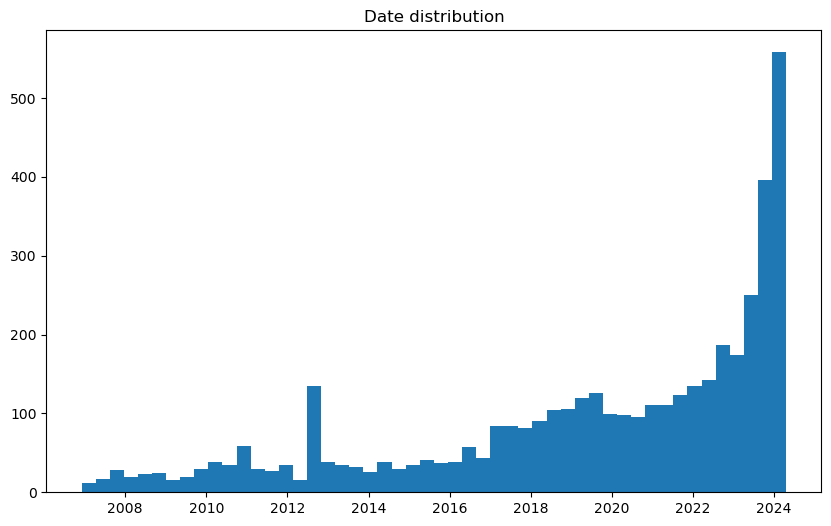

In [8]:
# plot date distribution
plt.figure(figsize=(10, 6))
dateplot = pd.to_datetime(df['date'])
dateplot.hist(bins=50)
plt.title('Date distribution')
#disable grid
plt.grid(False)
plt.show()

In [9]:
# regex to extract date in format yyyy/mm/dd
dfs['date'] = dfs['date'].apply(lambda x: x.split(' ')[0])
dfs['date'] = pd.to_datetime(dfs['date'])
print(len(dfs))
dfs.head()

2550


,name,user,date,text
0,Roberto Marsicano,@cannedcat.bsky.social,2024-09-21,a top-1% fund manager warns warren buffett is ...
1,copgamer,@copigamer.bsky.social,2024-09-21,microstrategy outperformed the s&p 500 with it...
2,Aqsa,@aqsaa.bsky.social,2024-09-21,$mstr is beating 100% of the s&p 500 with
3,Sketchy News,@sketchynews.net,2024-09-21,rate-cut euphoria is fading amid reminders of ...
4,Basquiatball,@basquiatball.bsky.social,2024-09-20,the computer that manages my s&p 500 eft poste...


In [10]:
# filter df date to get 2020-2024
df = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2024-12-31')]
print(len(df))
df.head()

2411


,title,text,label,links,symbol,company,date
0,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,-2,https://www.cnbc.com/2023/06/05/stocks-making-...,MMM,3M,2023-06-05
1,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,-2,https://www.cnbc.com/2022/07/26/3m-will-spin-o...,MMM,3M,2022-07-26
2,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,0,https://www.cnbc.com/2023/01/24/stocks-making-...,MMM,3M,2023-01-24
3,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,0,https://www.cnbc.com/2023/01/24/3m-to-cut-2500...,MMM,3M,2023-01-24
4,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",-2,https://www.cnbc.com/2022/08/26/3m-combat-earp...,MMM,3M,2022-08-26


In [11]:
# intersection of dates between dfs and df
dfs['date'] = pd.to_datetime(dfs['date'])
df['date'] = pd.to_datetime(df['date'])

# Interseção de datas entre dfs e df
dates = set(dfs['date']).intersection(set(df['date']))
print(len(dates))

# a primeira data que se intersecta
date1 = sorted(dates)[0]
date2 = sorted(dates)[-1]
print(date1, date2)

270
2023-06-13 00:00:00 2024-04-20 00:00:00


In [12]:
dateseries1 = dfs['date']
dateseries2 = df['date']

# sum of dates
concat = pd.concat([dateseries1, dateseries2])
concat.value_counts()

date
2024-08-05    53
2024-02-09    42
2024-09-19    36
2024-09-06    29
2024-08-06    24
              ..
2022-11-25     1
2021-01-30     1
2021-02-03     1
2021-11-12     1
2020-12-03     1
Name: count, Length: 1186, dtype: int64

In [13]:
df.head()

,title,text,label,links,symbol,company,date
0,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,-2,https://www.cnbc.com/2023/06/05/stocks-making-...,MMM,3M,2023-06-05
1,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,-2,https://www.cnbc.com/2022/07/26/3m-will-spin-o...,MMM,3M,2022-07-26
2,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,0,https://www.cnbc.com/2023/01/24/stocks-making-...,MMM,3M,2023-01-24
3,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,0,https://www.cnbc.com/2023/01/24/3m-to-cut-2500...,MMM,3M,2023-01-24
4,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",-2,https://www.cnbc.com/2022/08/26/3m-combat-earp...,MMM,3M,2022-08-26


In [14]:
dfs.head()

,name,user,date,text
0,Roberto Marsicano,@cannedcat.bsky.social,2024-09-21,a top-1% fund manager warns warren buffett is ...
1,copgamer,@copigamer.bsky.social,2024-09-21,microstrategy outperformed the s&p 500 with it...
2,Aqsa,@aqsaa.bsky.social,2024-09-21,$mstr is beating 100% of the s&p 500 with
3,Sketchy News,@sketchynews.net,2024-09-21,rate-cut euphoria is fading amid reminders of ...
4,Basquiatball,@basquiatball.bsky.social,2024-09-20,the computer that manages my s&p 500 eft poste...


In [15]:
save = False

if save:
    with open('data/pkl/df_news.pkl', 'wb') as f:
        pickle.dump(df, f)

    with open('data/pkl/df_socials.pkl', 'wb') as f:
        pickle.dump(dfs, f)